# **Example**

In [ ]:
# import all necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

((710, 1260), <matplotlib.image.AxesImage at 0x7aa30114d390>)

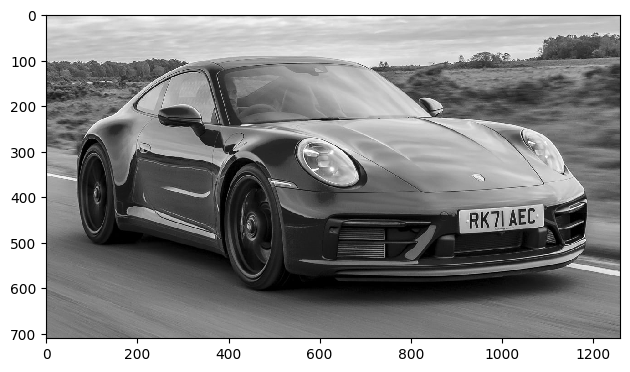

In [ ]:
# load image
image = imread('car.jpg', as_gray=True)
image.shape, imshow(image)

In [ ]:
# extract features from each pixel
features = np.reshape(image, (710*1260))
features.shape, features

((894600,),
 array([0.8526549 , 0.84873333, 0.84873333, ..., 0.50831569, 0.50831569,
        0.50439412]))

((710, 1260, 3), <matplotlib.image.AxesImage at 0x7aa300fc3ca0>)

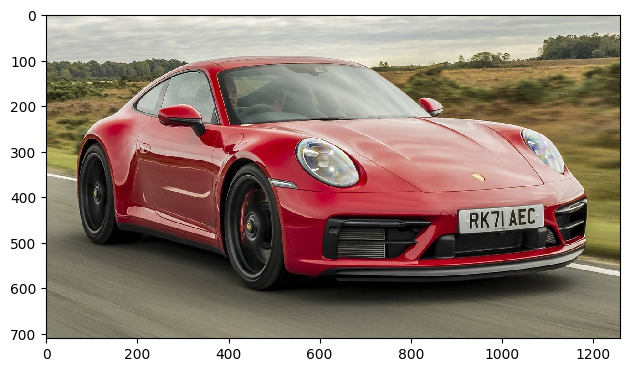

In [ ]:
image = imread('car.jpg')
image.shape, imshow(image)

In [ ]:
# extract Mean Pixel Value of Channels
feature_matrix = np.zeros((710,1260))

for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)

features = np.reshape(feature_matrix, (710*1260))
features.shape, features

((894600,), array([216., 215., 215., ..., 125., 125., 124.]))

**Extract Edge Features**

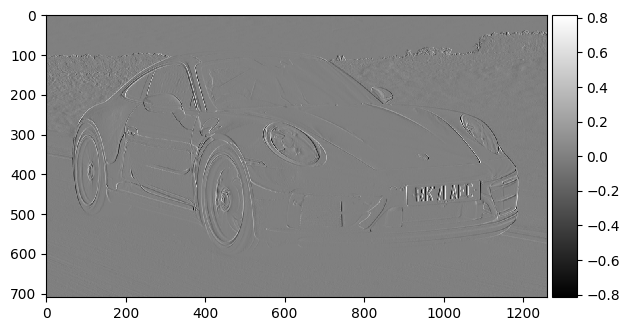

In [ ]:
from skimage.filters import prewitt_h, prewitt_v

image = imread('car.jpg',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)

#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

**Tugas 2**
1. Buatlah sebuah dataset yang terdiri dari 10 citra
2. Resize ukuran seluruh citra tersebut menjadi sama, misal 600 x 800.
3. Kemudian extract fitur dari seluruh citra tersebut menggunakan metode Mean Pixel Value of Channels
4. Simpan hasil ekstraksi dari kesemua citra tersebut dalam sebuah file .csv

# **Tugas 2**

In [1]:
# nama : yusril aminuddin
# nim : 201910370311366
# kelas : cbir sela 2023
# dosen pengampuh : bapak yufis azhar, S.Kom., M.Kom.
# penugasan : kedua

In [2]:
# ============
# INSTRUCTIONS
# ============
# Buatlah sebuah dataset yang terdiri dari 10 citra
# Resize ukuran seluruh citra tersebut menjadi sama, misal 600 x 800.
# Kemudian extract fitur dari seluruh citra tersebut menggunakan metode Mean Pixel Value of Channels
# Simpan hasil ekstraksi dari kesemua citra tersebut dalam sebuah file .csv

In [3]:
# import library yang dibutuhkan
from google.colab import drive
import glob
from skimage.io import imread, imshow
import numpy as np
import os
from PIL import Image
import pandas as pd

In [4]:
# mount GDrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# initial variable for dataset folder and resized folder
originalDataset = "/content/drive/MyDrive/Colab Notebooks/Sela 2023/CBIR/Tugas 2/dataset/"
resizedDataset = "/content/drive/MyDrive/Colab Notebooks/Sela 2023/CBIR/Tugas 2/resized/"
resultCsv = "/content/drive/MyDrive/Colab Notebooks/Sela 2023/CBIR/Tugas 2/result/"

In [6]:
# change directory to original dataset and show current path
os.chdir(originalDataset)
%pwd

'/content/drive/MyDrive/Colab Notebooks/Sela 2023/CBIR/Tugas 2/dataset'

In [7]:
# list dataset
%ls

avocado.jpg  berry.jpg  kiwi.jpg    papaya.jpg     strawberry.jpg
banana.jpg   grape.jpg  orange.jpg  pineapple.jpg  watermelon.jpg


In [8]:
# save 10 original images to array ended with .jpg extensions
images = [imread(file) for file in glob.glob(originalDataset + "*")]

((2400, 1920, 3), <matplotlib.image.AxesImage at 0x7e1fb3007610>)

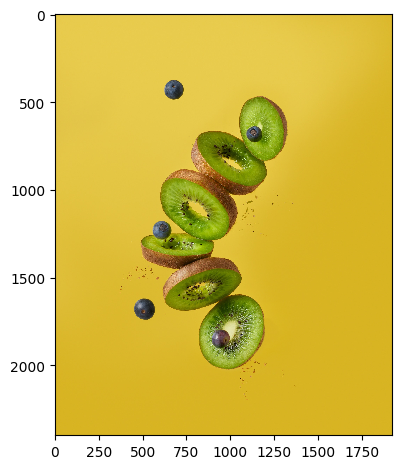

In [9]:
# check first original image and its shape
images[0].shape, imshow(images[0])

In [10]:
# change directory to resized dataset and show current path
os.chdir(resizedDataset)
%pwd

'/content/drive/MyDrive/Colab Notebooks/Sela 2023/CBIR/Tugas 2/resized'

In [11]:
# make sure resized folder is empty
%rm -rf *

for image in os.listdir(originalDataset):
  name, extension = os.path.splitext(image)
  img = Image.open(originalDataset + image)
  img = img.resize((100, 100))
  img.save(name + extension)
  print(img)

<PIL.Image.Image image mode=RGB size=100x100 at 0x7E1FEBB3B100>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7E1FB3EC4670>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7E1FB3EC4670>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7E1FB3EC4670>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7E1FEAD1BF40>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7E1FB3007A60>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7E1FB3007940>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7E1FB3007940>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7E1FEBB3AC20>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7E1FB30F3190>


In [12]:
# save 10 resized images to array ended with .jpg extensions
resized_images = [imread(file) for file in glob.glob(resizedDataset + "*")]

In [13]:
# get dataset name from resizedDataset dir
dataset_names = []

for image in os.listdir(resizedDataset):
  name, extension = os.path.splitext(image)
  dataset_names.append(name)

((100, 100, 3), <matplotlib.image.AxesImage at 0x7e1fb2ee9bd0>, 'kiwi')

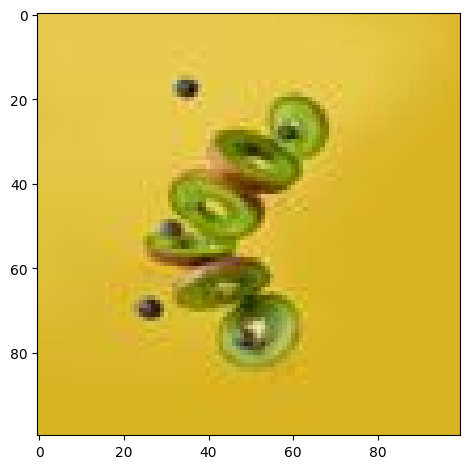

In [14]:
# check first resized image and its shape, for comparasion
resized_images[0].shape, imshow(resized_images[0]), dataset_names[0]

In [15]:
# extract Mean Pixel Value of Channels
feature_matrix = np.zeros((100, 100))
features_df = pd.DataFrame()

# code from example, additional with loop of resized_images
for image in resized_images:
  for i in range(0, image.shape[0]):
      for j in range(0, image.shape[1]):
          feature_matrix[i][j] = ((int(image[i, j, 0]) + int(image[i, j, 1]) + int(image[i, j, 2]))/3)

  # get feature
  features = np.reshape(feature_matrix, (100 * 100))

  # initial each feature as dataframe transposed
  raw_features_df = pd.DataFrame(features).T

  # save to final dataframe
  features_df = features_df.append(raw_features_df, ignore_index=True)

 # add name to each
features_df.insert(loc=0, column='name', value=dataset_names)

<ipython-input-15-6d683f46ce95>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(raw_features_df, ignore_index=True)


In [16]:
# validate with show
features_df

,name,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,kiwi,170.666667,170.666667,170.666667,170.666667,170.666667,170.666667,170.666667,170.666667,170.666667,...,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333,143.333333
1,pineapple,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,...,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667,245.666667
2,grape,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
3,strawberry,19.000000,19.000000,19.000000,18.000000,18.000000,18.000000,17.000000,17.000000,20.000000,...,91.666667,91.666667,92.666667,92.666667,91.000000,91.000000,95.666667,96.666667,97.666667,98.666667
4,berry,192.000000,193.000000,194.000000,195.000000,196.000000,198.000000,199.000000,199.000000,201.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,197.666667,197.666667,197.666667,197.666667
5,banana,182.666667,182.666667,182.666667,182.666667,182.666667,182.666667,182.666667,182.666667,184.666667,...,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667,183.666667
6,papaya,139.666667,139.666667,139.666667,139.666667,139.666667,139.666667,139.666667,139.666667,140.333333,...,124.666667,123.666667,124.000000,123.000000,123.000000,123.000000,122.000000,122.000000,122.000000,122.000000
7,avocado,212.333333,212.333333,212.333333,212.333333,212.333333,212.333333,212.333333,212.333333,213.333333,...,198.333333,199.333333,199.333333,198.333333,198.333333,197.333333,196.666667,196.666667,196.666667,196.666667
8,watermelon,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,...,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667,254.666667
9,orange,89.000000,89.666667,89.666667,90.333333,91.000000,92.000000,92.666667,92.666667,93.666667,...,89.000000,88.000000,87.333333,86.666667,86.000000,84.666667,83.000000,82.000000,81.000000,79.666667


In [17]:
# change directory to result dir and show current path
os.chdir(resultCsv)
%pwd

'/content/drive/MyDrive/Colab Notebooks/Sela 2023/CBIR/Tugas 2/result'

In [18]:
# make sure result folder is empty
%rm -rf *

# save dataframe to file .csv
features_df.to_csv("result.csv", sep=",", index=False)